In [1]:
# Import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23, stratify=y)

In [4]:
# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the Logistic Regression model
clf = LogisticRegression(random_state=4, max_iter=10000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=4)

In [6]:
# Predict on the test set
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

In [7]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"🔍 Logistic Regression model accuracy: {acc * 100:.2f}%")
print(f"📈 ROC-AUC Score: {roc_auc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

🔍 Logistic Regression model accuracy: 98.25%
📈 ROC-AUC Score: 0.9934

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



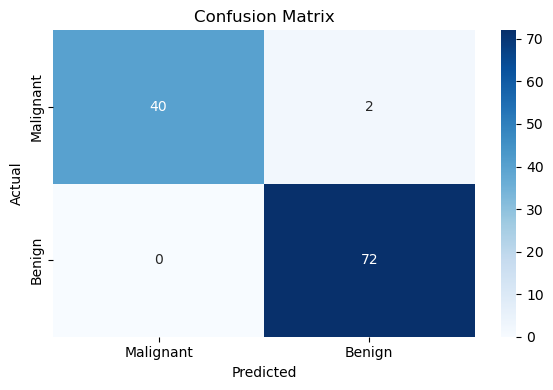

In [8]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()